In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn

In [2]:
df = pd.read_csv("D:/6th sem/labs/DL/final destination deep learning/week8_rnn/daily_csv.csv")

In [3]:
df = df.dropna()

In [4]:
y = df['Price'].values
x = np.arange(1, len(y), 1)
print(len(y))

5952


In [5]:
minm = y.min()
maxm = y.max()
print(minm, maxm)
y = (y - minm) / (maxm - minm)

1.05 18.48


In [6]:
X = []
Y = []
Sequence_Length = 10

In [7]:
for i in range(5900):  # Adjust loop bounds
    x_seq = []
    for j in range(i, i + Sequence_Length):
        x_seq.append(y[j])
    X.append(x_seq)
    Y.append(y[j+1])

In [8]:
X = np.array(X)
Y = np.array(Y)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42, shuffle=False, stratify=None)

In [10]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)     

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

In [11]:
dataset = MyDataset(x_train, y_train)
train_loader = DataLoader(dataset, shuffle=True, batch_size=256)

In [12]:
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=5, num_layers=1, batch_first=True)
        self.activation=nn.ReLU()
        self.fc1 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        output, _status = self.rnn(x)
        output = output[:, -1, :] #This line selects the output from the last time step of each sequence in the batch
        output=self.activation(output)
        output = self.fc1(output)
        return output

In [13]:
model = RNNModel()

# optimizer , loss
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 1500

c:\Dell\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# training loop
for i in range(epochs):
    for j, data in enumerate(train_loader):
        y_pred = model(data[:][0].view(-1, Sequence_Length,1)).reshape(-1)
        loss = criterion(y_pred, data[:][1])
        loss.backward()
        optimizer.step()
    if i % 50 == 0:
        print(i, "th iteration : ", loss)

0 th iteration :  tensor(0.2260, grad_fn=<MseLossBackward0>)
50 th iteration :  tensor(0.0333, grad_fn=<MseLossBackward0>)
100 th iteration :  tensor(0.0163, grad_fn=<MseLossBackward0>)
150 th iteration :  tensor(0.0145, grad_fn=<MseLossBackward0>)
200 th iteration :  tensor(0.0104, grad_fn=<MseLossBackward0>)
250 th iteration :  tensor(0.0151, grad_fn=<MseLossBackward0>)
300 th iteration :  tensor(0.0087, grad_fn=<MseLossBackward0>)
350 th iteration :  tensor(0.0028, grad_fn=<MseLossBackward0>)
400 th iteration :  tensor(0.0090, grad_fn=<MseLossBackward0>)
450 th iteration :  tensor(0.0195, grad_fn=<MseLossBackward0>)
500 th iteration :  tensor(0.0070, grad_fn=<MseLossBackward0>)
550 th iteration :  tensor(0.0129, grad_fn=<MseLossBackward0>)
600 th iteration :  tensor(0.0128, grad_fn=<MseLossBackward0>)
650 th iteration :  tensor(0.0069, grad_fn=<MseLossBackward0>)
700 th iteration :  tensor(0.0042, grad_fn=<MseLossBackward0>)
750 th iteration :  tensor(0.0031, grad_fn=<MseLossBackwar

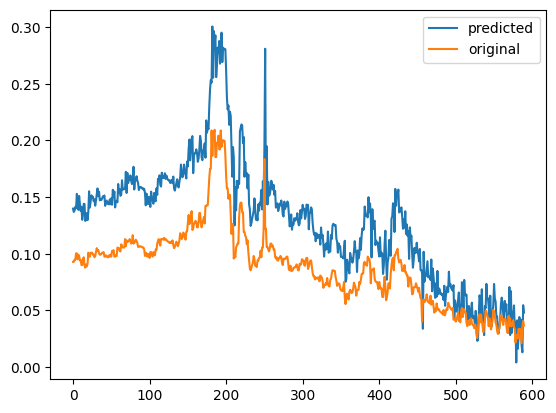

In [15]:
test_set = MyDataset(x_test, y_test)
test_pred = model(test_set[:][0].view(-1, 10, 1)).view(-1)
plt.plot(test_pred.detach().numpy(), label='predicted')
plt.plot(test_set[:][1].view(-1), label='original')
plt.legend()
plt.show()